In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu
import func4behav as fb
import matplotlib
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tACS-Attention\\processing\\behavior\\func4behav.py'>

In [19]:
def make_tables(case):
# case = 'endo valid'
    behavior_compare, experiment = fb.create_allsubs_compare()
    for subject_id in range (1,19):
        behavior_before, behavior_after = fb.load_behavior(subject_id)
        behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)

    behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & 
                                            (behavior_compare['reaction time'] > 0.05) & (behavior_compare['reaction time'] < 1)]
    behavior_before, behavior_after = fb.filter_behav(case, behavior_compare.loc[behavior_compare['session'] == 'before'], 
                                                    behavior_compare.loc[behavior_compare['session'] == 'after'])

    behavior_compare = pd.concat([behavior_before, behavior_after])
    rt_sham_before = behavior_before.loc[behavior_compare['Real stimulation'] == 0]
    rt_sham_after = behavior_after.loc[behavior_compare['Real stimulation'] == 0 ]
    rt_real_before = behavior_before.loc[behavior_compare['Real stimulation'] == 1]
    rt_real_after = behavior_after.loc[behavior_compare['Real stimulation'] == 1]

    # preprocessing
    if case == 'endo invalid':
        rt_sham_before = fb.remove_outlier(rt_sham_before, k=1, left=False, right=True, verbose=False)
        rt_sham_after = fb.remove_outlier(rt_sham_after, k=0.6, left=True, right=False, verbose=False)
        rt_real_before = fb.remove_outlier(rt_real_before, k=1, left=True, right=False, verbose=False)
        rt_real_after = fb.remove_outlier(rt_real_after, k=0.8, left=False, right=True, verbose=False)

        rt_sham_before = rt_sham_before.loc[:, 'reaction time'].tolist()
        rt_sham_after = rt_sham_after.loc[:, 'reaction time'].tolist()
        rt_real_before = rt_real_before.loc[:, 'reaction time'].tolist()
        rt_real_after = rt_real_after.loc[:, 'reaction time'].tolist()

        # duplicates
        n_times = 4
        rt_sham_before = rt_sham_before * n_times
        rt_sham_after = rt_sham_after * n_times
        rt_real_before = rt_real_before * n_times
        rt_real_after = rt_real_after * n_times
    else:
        k_out = [1, 1, 1, 1]
        rt_sham_before = fb.remove_outlier(rt_sham_before, k=k_out[0], left=False, right=True, verbose=False)
        rt_sham_after = fb.remove_outlier(rt_sham_after, k=k_out[1], left=True, right=False, verbose=False)
        rt_real_before = fb.remove_outlier(rt_real_before, k=k_out[2], left=True, right=False, verbose=False)
        rt_real_after = fb.remove_outlier(rt_real_after, k=k_out[3], left=False, right=True, verbose=False)

        rt_sham_before = rt_sham_before.loc[:, 'reaction time'].tolist()
        rt_sham_after = rt_sham_after.loc[:, 'reaction time'].tolist()
        rt_real_before = rt_real_before.loc[:, 'reaction time'].tolist()
        rt_real_after = rt_real_after.loc[:, 'reaction time'].tolist()
        
    # rt_sham_before = [num * 1000 for num in rt_sham_before]
    # rt_sham_after = [num * 1000 for num in rt_sham_after]
    # rt_real_before = [num * 1000 for num in rt_real_before]
    # rt_real_after = [num * 1000 for num in rt_real_after]

    # make table
    df = pd.DataFrame(columns=['Group', 'PrePost', 'Type', 'RT'])
    # Create a new DataFrame for the new rows to be inserted
    new_rows = pd.DataFrame({
        'Group': ['sham'] * len(rt_sham_before),    # Repeat 'sham' for the length of rt_sham_before
        'PrePost': ['pre'] * len(rt_sham_before),   # Repeat 'pre' for the same length
        'Type': [case] * len(rt_sham_before),  # Repeat 'endo valid' for the same length
        'RT': rt_sham_before                        # Reaction times
    })
    df = pd.concat([df, new_rows], ignore_index=True)

    new_rows = pd.DataFrame({
        'Group': ['sham'] * len(rt_sham_after),    # Repeat 'sham' for the length of rt_sham_before
        'PrePost': ['post'] * len(rt_sham_after),   # Repeat 'pre' for the same length
        'Type': [case] * len(rt_sham_after),  # Repeat 'endo valid' for the same length
        'RT': rt_sham_after                        # Reaction times
    })
    df = pd.concat([df, new_rows], ignore_index=True)

    new_rows = pd.DataFrame({
        'Group': ['active'] * len(rt_real_before),    # Repeat 'sham' for the length of rt_sham_before
        'PrePost': ['pre'] * len(rt_real_before),   # Repeat 'pre' for the same length
        'Type': [case] * len(rt_real_before),  # Repeat 'endo valid' for the same length
        'RT': rt_real_before                        # Reaction times
    })
    df = pd.concat([df, new_rows], ignore_index=True)

    new_rows = pd.DataFrame({
        'Group': ['active'] * len(rt_real_after),    # Repeat 'sham' for the length of rt_sham_before
        'PrePost': ['post'] * len(rt_real_after),   # Repeat 'pre' for the same length
        'Type': [case] * len(rt_real_after),  # Repeat 'endo valid' for the same length
        'RT': rt_real_after                        # Reaction times
    })
    df = pd.concat([df, new_rows], ignore_index=True)

    return df

# # Calculate means
# means = [np.mean(rt_sham_before)+50, np.mean(rt_sham_after)+50, np.mean(rt_real_before)+50, np.mean(rt_real_after)+50]

# # Calculate standard errors
# std_errors = [
#     np.std(rt_sham_before) / np.sqrt(len(rt_sham_before)), np.std(rt_sham_after) / np.sqrt(len(rt_sham_after)),
#     np.std(rt_real_before) / np.sqrt(len(rt_real_before)), np.std(rt_real_after) / np.sqrt(len(rt_real_after))
# ]


In [20]:
df_endo_valid = make_tables('endo valid')
df_endo_invalid = make_tables('endo invalid')
df_exo_valid = make_tables('exo valid')
df_exo_invalid = make_tables('exo invalid')

df = pd.concat([df_endo_valid, df_endo_invalid, df_exo_valid, df_exo_invalid], ignore_index=True)
all_rt = df['RT']

c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tACS-Attention\processing\behavior\func4behav.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  behavior_compare = pd.concat([behavior_compare, new_row], ignore_index=True)
C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_32012\3016412408.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_rows], ignore_index=True)
c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Doc

In [21]:
from scipy.stats import shapiro

res = stats.shapiro(all_rt)

C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_32012\1788712090.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5238.
  res = stats.shapiro(all_rt)


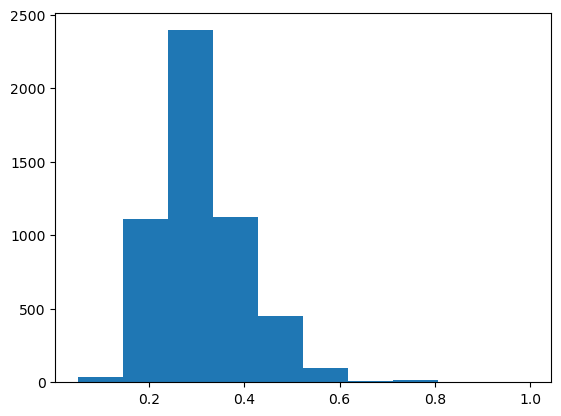

In [22]:
plt.hist(all_rt)
plt.show()

In [23]:
res.statistic

0.9458620621311413

In [24]:
res.pvalue

3.536744991873284e-40

In [25]:
res_endo_valid = shapiro(df_endo_valid['RT'])
print('statistic:', res_endo_valid.statistic)
print('p_value:', res_endo_valid.pvalue)

statistic: 0.942652143580735
p_value: 8.623822120253092e-25


In [26]:
res_endo_invalid = shapiro(df_endo_invalid['RT'])
print('statistic:', res_endo_invalid.statistic)
print('p_value:', res_endo_invalid.pvalue)

statistic: 0.9777287761146766
p_value: 9.232886522459618e-15


In [27]:
res_exo_valid = shapiro(df_exo_valid['RT'])
print('statistic:', res_exo_valid.statistic)
print('p_value:', res_exo_valid.pvalue)

statistic: 0.9129020735074399
p_value: 1.286511394609973e-29


In [28]:
res_exo_invalid = shapiro(df_exo_invalid['RT'])
print('statistic:', res_exo_invalid.statistic)
print('p_value:', res_exo_invalid.pvalue)

statistic: 0.9874817639756969
p_value: 0.0013742077444968649


In [29]:
import numpy as np
from scipy.stats import shapiro

# Generate two normal distributions with slightly different mean values
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=500)
data2 = np.random.normal(loc=0.5, scale=1, size=500)

# Combine the two datasets
combined_data = np.concatenate((data1, data2))

# Perform the Shapiro-Wilk test
shapiro_test = shapiro(combined_data)
shapiro_test


ShapiroResult(statistic=0.9987809578650173, pvalue=0.7424739347039356)